In [15]:
#Problem Statement
"""
*Sentiment Analysis of Movie Trailer Comments using NLP

Conducted a comprehensive sentiment analysis of YouTube comments for a movie trailer as an AI Service Provider, quantifying positive and negative reactions to predict the trailer's potential box office performance. The analysis will:

- Classify comment sentiments(positive or negative)
- Generate an overall sentiment score
- Provide insights into audience reception
- Assess the trailer's market appeal

"""

"\n*Sentiment Analysis of Movie Trailer Comments using NLP\n\nConducted a comprehensive sentiment analysis of YouTube comments for a movie trailer as an AI Service Provider, quantifying positive and negative reactions to predict the trailer's potential box office performance. The analysis will:\n\n- Classify comment sentiments(positive or negative)\n- Generate an overall sentiment score\n- Provide insights into audience reception\n- Assess the trailer's market appeal\n\n"

In [16]:
#Tools used in this project:
"""
PyTorch - torch
HuggingFace - transformers
NLTK - nltk
VADER - sentiment.vader
"""

'\nPyTorch - torch\nHuggingFace - transformers\nNLTK - nltk\nVADER - sentiment.vader\n'

In [17]:
!pip install torch

In [18]:
!pip install transformers

In [19]:
!pip install nltk

In [20]:
!pip install vaderSentiment

In [21]:
import nltk

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
from transformers import pipeline

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sia = SentimentIntensityAnalyzer()
stop_words = stop_words = set(stopwords.words('english'))
classifier = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

Device set to use cpu


In [24]:
import pandas as pd
df = pd.read_excel("/content/SnowWhite Comments YT.xlsx")
os.listdir("/content")



['.config', 'SnowWhite Comments YT.xlsx', 'sample_data']

In [25]:
comments = []
comments = df['Comments'].tolist()

In [26]:
def remove_stopwords(raw_comment):
  tokenized_comment = word_tokenize(raw_comment)
  processed_comment = [ word for word in tokenized_comment if word.lower() not in stop_words]
  return ' '.join(processed_comment)

In [27]:
def get_comment_sentiment_details(raw_comment):
  processed_comment = remove_stopwords(raw_comment)

  words = processed_comment.split()
  positive_words = ""
  negative_words = ""
  comment_sentiment = "" #Either positive or negative

  sentence_score_temp = sia.polarity_scores(processed_comment)

  abs_sentence_score = abs(sentence_score_temp['compound']) #absolute value of -3.4 = 3.4
  sentiment_label = classifier( processed_comment)
  comment_sentiment = sentiment_label[0]['label']

  if abs_sentence_score == 0 :
    comment_sentiment = "NEUTRAL"

  if comment_sentiment == "NEGATIVE":
    sentence_score = abs_sentence_score * -1
    for word in words:
      word_sentiment = sia.polarity_scores(word)
      if word_sentiment ['compound'] < 0:
        negative_words += word + ""

  elif comment_sentiment == "POSITIVE":
    sentence_score = abs_sentence_score
    for word in words:
      word_sentiment = sia.polarity_scores(word)
      if word_sentiment['compound'] > 0:
        positive_words += word + " "
  else:
    sentence_score = abs_sentence_score

  return positive_words, negative_words, sentence_score, comment_sentiment


In [28]:
positive_words = ""
negative_words = ""

pos_values_list = []
neg_values_list = []
avg_pos_score = 0
avg_neg_score = 0
neu_count = 0

for comment in comments:
  pw, nw, ss, cs = get_comment_sentiment_details(comment)
  positive_words += pw + " " #storing pw from each comment into our central positive words
  negative_words += nw + " "

  if cs == "NEGATIVE":
    neg_values_list.append(ss)
  elif cs == "POSITIVE":
    pos_values_list.append(ss)
  else:
    neu_count += 1

  try:
    avg_pos_score = sum(pos_values_list) / len(pos_values_list)
    avg_neg_score = sum(neg_values_list) / len(neg_values_list)
  except ZeroDivisionError:
    if len(pos_values_list) == 0 or len(neg_values_list) == 0:
      avg_pos_score = 0
      avg_neg_score = 0

  final_score = (avg_pos_score + avg_neg_score) / (len(pos_values_list) + len(neg_values_list))


In [29]:
print(final_score)

0.0023106914414414413


In [30]:
positive_words

'   Yay   hope      beauty true beauty beautiful yes beautiful  Pretty  hope                  credit brave open😂    greatest     true   prettier 😂         likes     great ❤  Admit          lover hope       hope win     supportive masterpiece   romantic Marvel 😅          admit admire bravery     save       great want original original  Well giving  love    thank   Jokes great   '

In [31]:
negative_words

'poison    broke  hate       mess🙁👎🏽 insult   stopstop disappointed dislike dislikes.bomb destroy cruelty bad  bad      seriously   madnessWORSTDOOM DROPDISLIKELEAVE     stoppropaganda   CGI….😭  mad😠🤬😂   worst    BadBad   poor   abused empty  poor Nahscream     cut 😢😂   lost    lowestdestroy dumpsterfire   sucks horrendousawful       flop          Dislikes  evil '

In [32]:
avg_pos_score

0.5963791666666667

In [33]:
avg_neg_score

-0.42538800000000004

In [34]:
!pip install wordcloud

positives


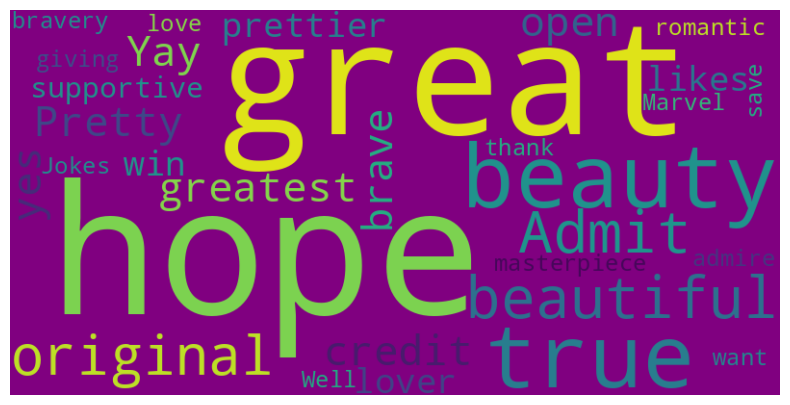

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("positives")

wordcloud_positive = WordCloud(width = 800 ,height = 400, background_color = 'purple').generate(positive_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation = 'bilinear')
plt.axis('off')
plt.show()


negatives


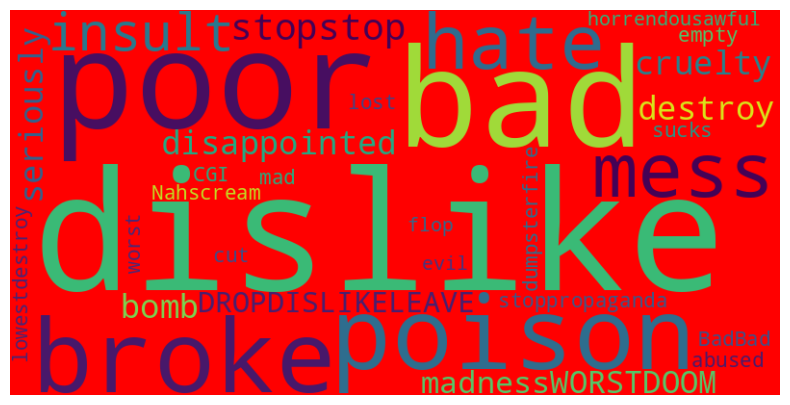

In [36]:
print("negatives")

wordcloud_negative = WordCloud(width = 800, height = 400, background_color = 'red').generate(negative_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation = 'bilinear')
plt.axis('off')
plt.show()